In [1]:
import numpy
import pandas


In [33]:
import numpy
import pandas as pd

# Carga el archivo CSV
df = pd.read_csv("chip_dataset.csv")

# Muestra las primeras filas
df.head()

#eliminar valores no numéricos o vacíos
freq_values = pd.to_numeric(df['Freq (MHz)'], errors='coerce').dropna()

#Calcular estadisticas promedio, mediana, desviación estándar, mínimo, máximo y rango, para columna Freq (MHZ)

# Calcular estadísticas
promedio = freq_values.mean()
mediana = freq_values.median()
desviacion_estandar = freq_values.std()
minimo = freq_values.min()
maximo = freq_values.max()
rango = maximo - minimo

# Mostrar resultados
print(f"Promedio: {promedio:.2f} MHz")
print(f"Mediana: {mediana:.2f} MHz")
print(f"Desviación estándar: {desviacion_estandar:.2f} MHz")
print(f"Mínimo: {minimo:.2f} MHz")
print(f"Máximo: {maximo:.2f} MHz")
print(f"Rango: {rango:.2f} MHz")

#Calculando lo mismo para TDP (W)
tdp_values = pd.to_numeric(df['TDP (W)'], errors='coerce').dropna()
# Calculando estadísticas
promedio = tdp_values.mean()
mediana = tdp_values.median()
desviacion_estandar = tdp_values.std()
minimo = tdp_values.min()
maximo = tdp_values.max()
rango = maximo - minimo

print("***************** TDP *********************")
# Mostrar resultados TDP
print(f"TDP Promedio: {promedio:.2f} watts")
print(f"TDP Mediana: {mediana:.2f} watts")
print(f"TDP Desviación estándar: {desviacion_estandar:.2f} watts")
print(f"TDP Mínimo: {minimo:.2f} watts")
print(f"TDP Máximo: {maximo:.2f} watts")
print(f"TDP Rango: {rango:.2f} watts")


Promedio: 1484.41 MHz
Mediana: 1073.50 MHz
Desviación estándar: 1066.70 MHz
Mínimo: 100.00 MHz
Máximo: 4700.00 MHz
Rango: 4600.00 MHz
***************** TDP *********************
TDP Promedio: 81.36 watts
TDP Mediana: 65.00 watts
TDP Desviación estándar: 76.81 watts
TDP Mínimo: 1.00 watts
TDP Máximo: 900.00 watts
TDP Rango: 899.00 watts


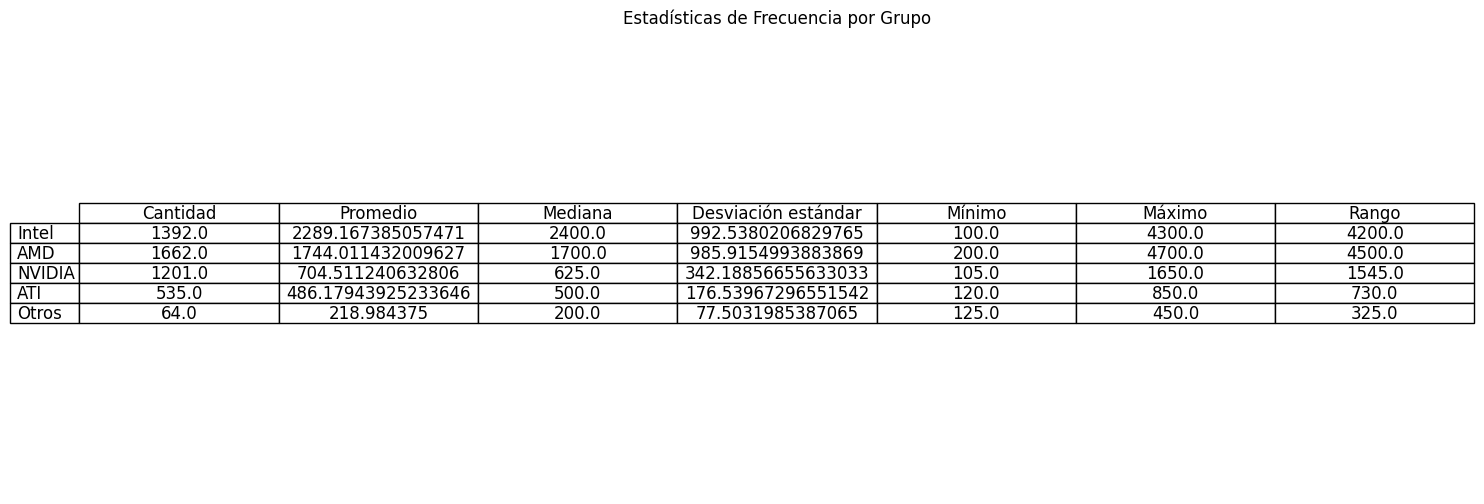

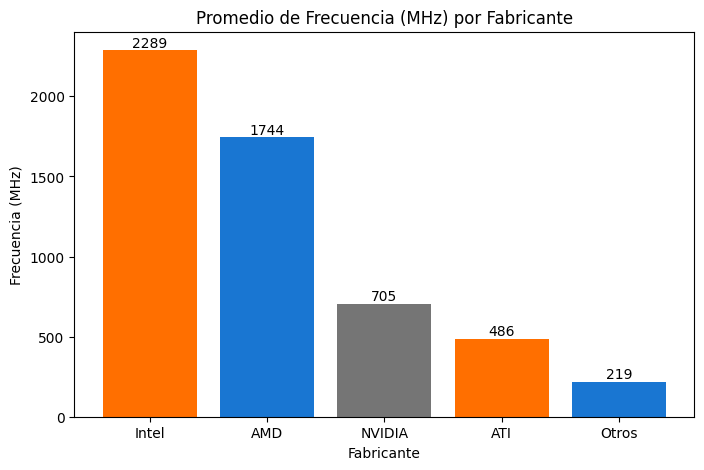

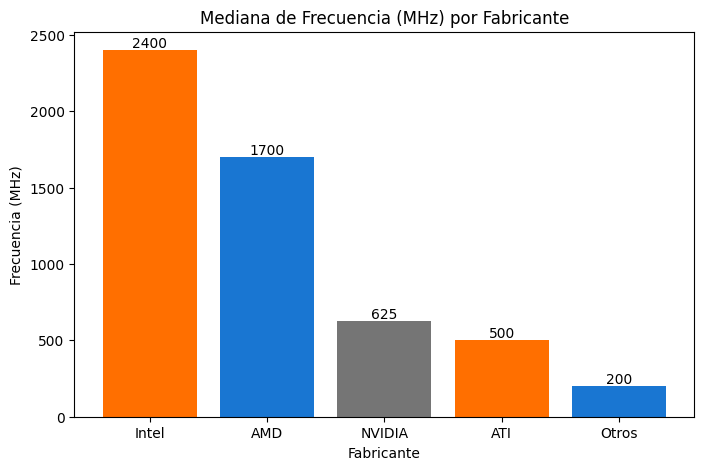

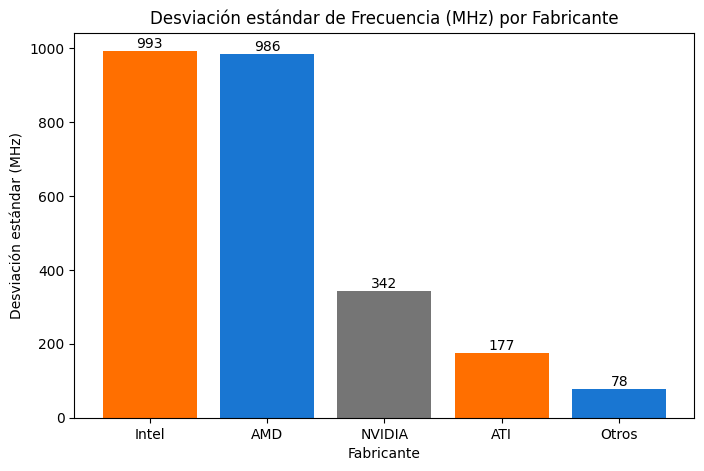

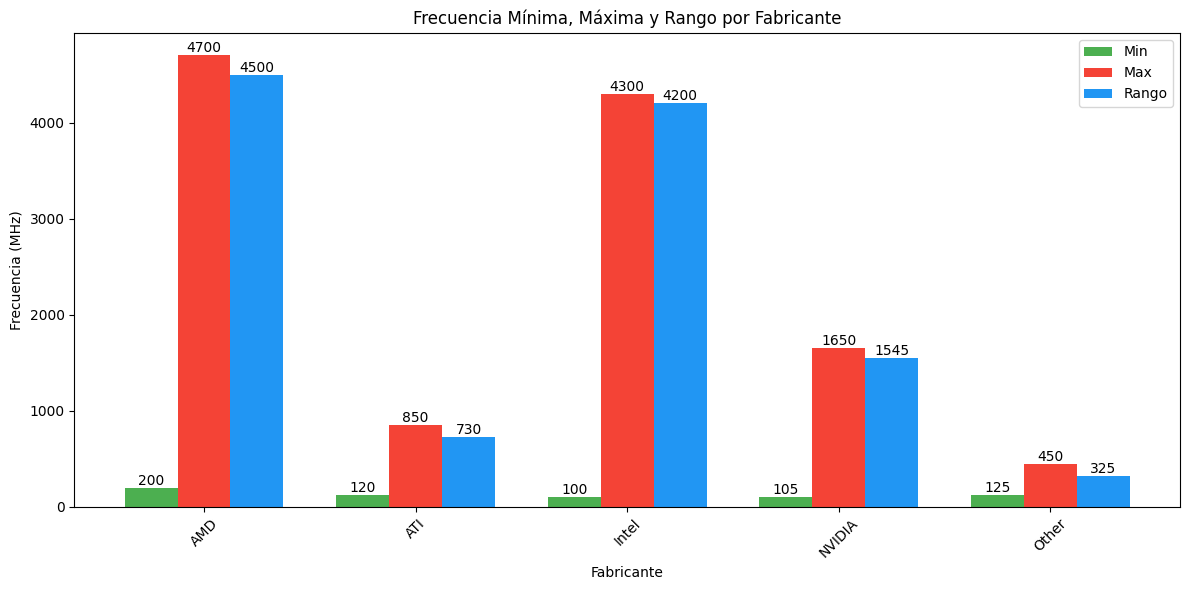

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo
df = pd.read_csv('chip_dataset.csv')

# Limpiamos columna de frecuencia
df['Freq (MHz)'] = pd.to_numeric(df['Freq (MHz)'], errors='coerce')

# Creamos columna de grupo, usando un condicional para evaluar los valores v en el dataframe Vendor
df['Grupo'] = ['AMD' if isinstance(v, str) and 'AMD' in v else
               'Intel' if isinstance(v, str) and 'Intel' in v else
               'NVIDIA' if isinstance(v, str) and 'NVIDIA' in v else
               'ATI' if isinstance(v, str) and 'ATI' in v else
               'Otros' for v in df['Vendor']]

#Agrupamos usando el Grupo que recien creamos y sacamos y calculamos estadísticas
tabla = df.groupby('Grupo')['Freq (MHz)'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
])
tabla['rango'] = tabla['max'] - tabla['min']

# Renombramos columnas para español
tabla = tabla.rename(columns={
    'count': 'Cantidad',
    'mean': 'Promedio',
    'median': 'Mediana',
    'std': 'Desviación estándar',
    'min': 'Mínimo',
    'max': 'Máximo',
    'rango': 'Rango'
})
tabla = tabla.sort_values(by='Promedio', ascending=False)
#Mostrar tabla con información estadística
fig, ax = plt.subplots(figsize=(15, 6)) 
ax.axis('tight')
ax.axis('off')
tabla_plot = ax.table(cellText=tabla.values, colLabels=tabla.columns, rowLabels=tabla.index, cellLoc='center', loc='center')
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(12)
tabla_plot.scale(1.2, 1.2)
plt.title('Estadísticas de Frecuencia por Grupo')
plt.show()


# Gráfico de promedios

plt.figure(figsize=(8,5))
barras = plt.bar(tabla.index, tabla['Promedio'], color=['#FF6F00', '#1976D2', '#757575'])
plt.title('Promedio de Frecuencia (MHz) por Fabricante')
plt.ylabel('Frecuencia (MHz)')
plt.xlabel('Fabricante')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')
plt.show()

# Gráfico de medianas
plt.figure(figsize=(8,5))
barras = plt.bar(tabla.index, tabla['Mediana'], color=['#FF6F00', '#1976D2', '#757575'])
plt.title('Mediana de Frecuencia (MHz) por Fabricante')
plt.ylabel('Frecuencia (MHz)')
plt.xlabel('Fabricante')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')
plt.show()

# Gráfico de desviación estándar
plt.figure(figsize=(8,5))
barras = plt.bar(tabla.index, tabla['Desviación estándar'], color=['#FF6F00', '#1976D2', '#757575'])
plt.title('Desviación estándar de Frecuencia (MHz) por Fabricante')
plt.ylabel('Desviación estándar (MHz)')
plt.xlabel('Fabricante')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')
plt.show()


#Agrupar por vendor y obtener min, max y rangos

# Agrupar por 'Vendor' y calcular min, max y rango de 'Freq (MHz)'
tablaminmax = df.groupby('Vendor')['Freq (MHz)'].agg(['min', 'max'])
tablaminmax['rango'] = tablaminmax['max'] - tablaminmax['min']

# Crear gráfico de barras agrupadas
x = np.arange(len(tablaminmax))  # posiciones de los grupos
width = 0.25  # ancho de cada barra

plt.figure(figsize=(12,6))
barras_min = plt.bar(x - width, tablaminmax['min'], width, label='Min', color='#4CAF50')
barras_max = plt.bar(x, tablaminmax['max'], width, label='Max', color='#F44336')
barras_rango = plt.bar(x + width, tablaminmax['rango'], width, label='Rango', color='#2196F3')

# Etiquetas y título
plt.xticks(x, tablaminmax.index, rotation=45)
plt.ylabel('Frecuencia (MHz)')
plt.xlabel('Fabricante')
plt.title('Frecuencia Mínima, Máxima y Rango por Fabricante')
plt.legend()

# Añadir etiquetas a cada barra
for barras in [barras_min, barras_max, barras_rango]:
    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()







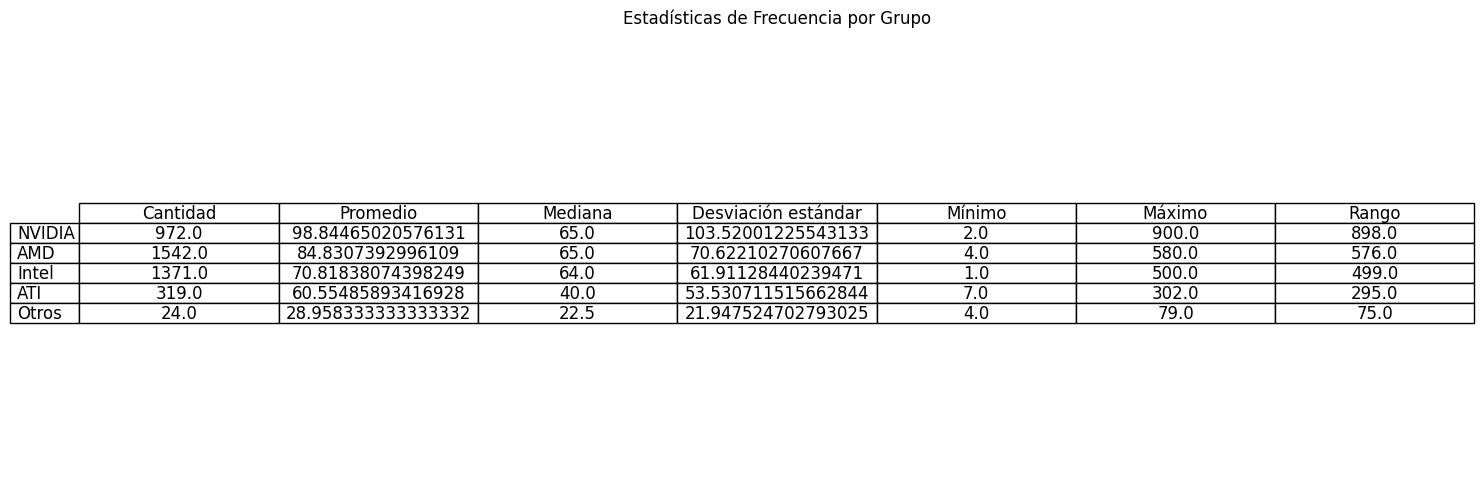

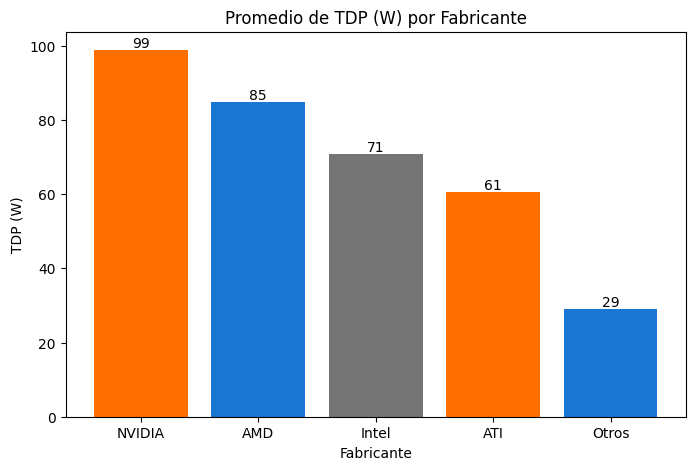

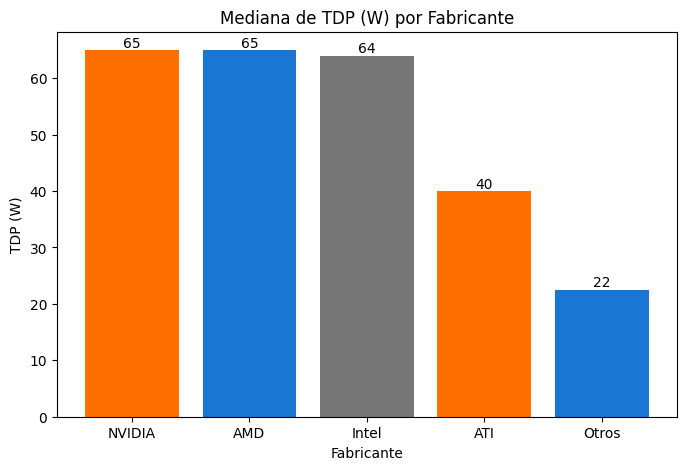

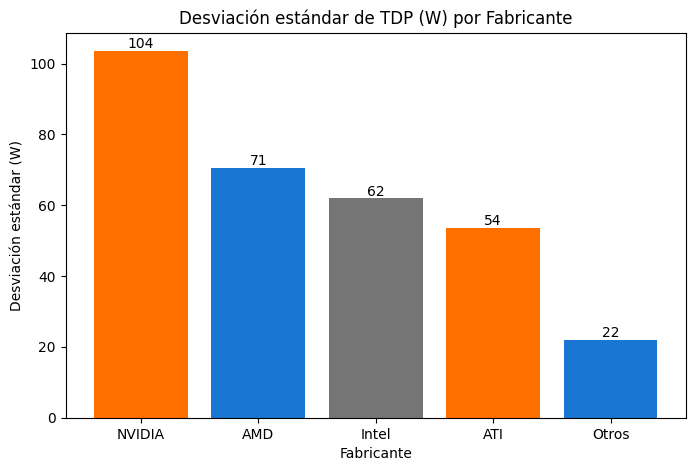

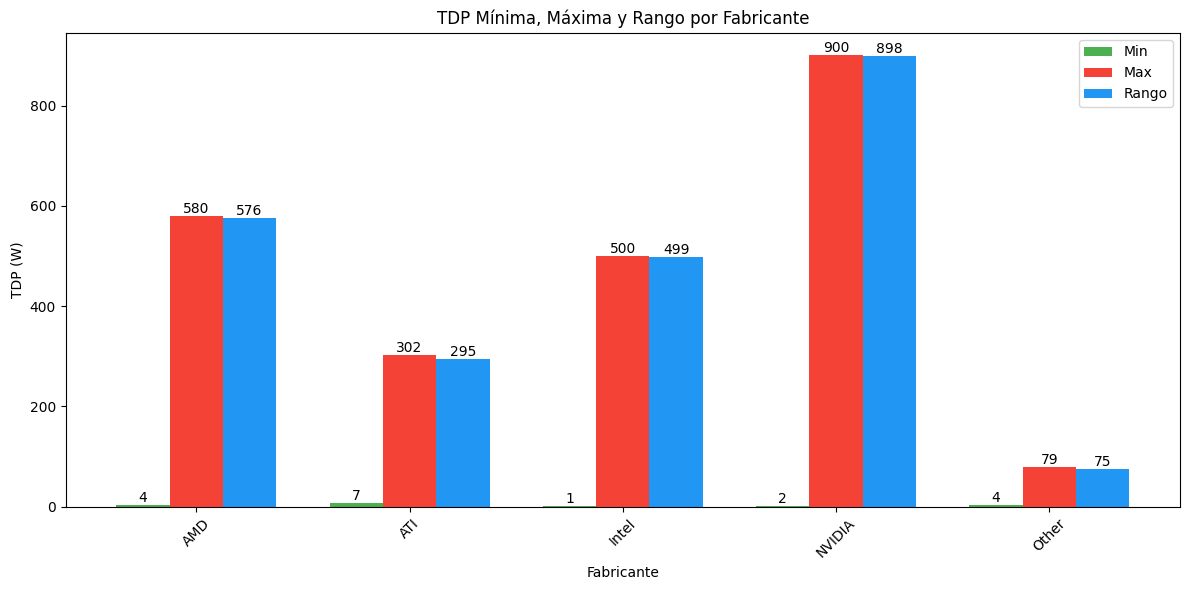

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo
df = pd.read_csv('chip_dataset.csv')

# Limpiamos columna de frecuencia
df['TDP (W)'] = pd.to_numeric(df['TDP (W)'], errors='coerce')

# Creamos columna de grupo, usando un condicional para evaluar los valores v en el dataframe Vendor
df['Grupo'] = ['AMD' if isinstance(v, str) and 'AMD' in v else
               'Intel' if isinstance(v, str) and 'Intel' in v else
               'NVIDIA' if isinstance(v, str) and 'NVIDIA' in v else
               'ATI' if isinstance(v, str) and 'ATI' in v else
               'Otros' for v in df['Vendor']]

#Agrupamos usando el Grupo que recien creamos y sacamos y calculamos estadísticas
tabla = df.groupby('Grupo')['TDP (W)'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
])
tabla['rango'] = tabla['max'] - tabla['min']

# Renombramos columnas para español
tabla = tabla.rename(columns={
    'count': 'Cantidad',
    'mean': 'Promedio',
    'median': 'Mediana',
    'std': 'Desviación estándar',
    'min': 'Mínimo',
    'max': 'Máximo',
    'rango': 'Rango'
})


#Mostrar tabla con información estadística
tabla = tabla.sort_values(by='Promedio', ascending=False)

fig, ax = plt.subplots(figsize=(15, 6)) 
ax.axis('tight')
ax.axis('off')
tabla_plot = ax.table(cellText=tabla.values, colLabels=tabla.columns, rowLabels=tabla.index, cellLoc='center', loc='center')
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(12)
tabla_plot.scale(1.2, 1.2)
plt.title('Estadísticas de Frecuencia por Grupo')
plt.show()


# Gráfico de promedios

plt.figure(figsize=(8,5))
barras = plt.bar(tabla.index, tabla['Promedio'], color=['#FF6F00', '#1976D2', '#757575'])
plt.title('Promedio de TDP (W) por Fabricante')
plt.ylabel('TDP (W)')
plt.xlabel('Fabricante')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')
plt.show()

# Gráfico de medianas
plt.figure(figsize=(8,5))
barras = plt.bar(tabla.index, tabla['Mediana'], color=['#FF6F00', '#1976D2', '#757575'])
plt.title('Mediana de TDP (W) por Fabricante')
plt.ylabel('TDP (W)')
plt.xlabel('Fabricante')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')
plt.show()

# Gráfico de desviación estándar
plt.figure(figsize=(8,5))
barras = plt.bar(tabla.index, tabla['Desviación estándar'], color=['#FF6F00', '#1976D2', '#757575'])
plt.title('Desviación estándar de TDP (W) por Fabricante')
plt.ylabel('Desviación estándar (W)')
plt.xlabel('Fabricante')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')
plt.show()


#Agrupar por vendor y obtener min, max y rangos

# Agrupar por 'Vendor' y calcular min, max y rango de 'Freq (MHz)'
tablaminmax = df.groupby('Vendor')['TDP (W)'].agg(['min', 'max'])
tablaminmax['rango'] = tablaminmax['max'] - tablaminmax['min']

# Crear gráfico de barras agrupadas
x = np.arange(len(tablaminmax))  # posiciones de los grupos
width = 0.25  # ancho de cada barra

plt.figure(figsize=(12,6))
barras_min = plt.bar(x - width, tablaminmax['min'], width, label='Min', color='#4CAF50')
barras_max = plt.bar(x, tablaminmax['max'], width, label='Max', color='#F44336')
barras_rango = plt.bar(x + width, tablaminmax['rango'], width, label='Rango', color='#2196F3')

# Etiquetas y título
plt.xticks(x, tablaminmax.index, rotation=45)
plt.ylabel('TDP (W)')
plt.xlabel('Fabricante')
plt.title('TDP Mínima, Máxima y Rango por Fabricante')
plt.legend()

# Añadir etiquetas a cada barra
for barras in [barras_min, barras_max, barras_rango]:
    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()